In [3]:
#importing the libraries
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
#read the data
data = pd.read_csv(r"C:\Users\sheetal\Desktop\Assignments\MLR (1)\MLR\ToyotaCorolla - MLR.csv")

In [5]:
data.head()

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500,23,46986,Diesel,90,0,2000,3,4,5,1165
1,13750,23,72937,Diesel,90,0,2000,3,4,5,1165
2,13950,24,41711,Diesel,90,0,2000,3,4,5,1165
3,14950,26,48000,Diesel,90,0,2000,3,4,5,1165
4,13750,30,38500,Diesel,90,0,2000,3,4,5,1170


In [6]:
data.describe()

,Price,Age_08_04,KM,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
count,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.00000,1436.000000,1436.0,1436.000000,1436.00000
mean,10730.824513,55.947075,68533.259749,101.502089,0.055710,1576.85585,4.033426,4.0,5.026462,1072.45961
std,3626.964585,18.599988,37506.448872,14.981080,0.229441,424.38677,0.952677,0.0,0.188510,52.64112
min,4350.000000,1.000000,1.000000,69.000000,0.000000,1300.00000,2.000000,4.0,3.000000,1000.00000
25%,8450.000000,44.000000,43000.000000,90.000000,0.000000,1400.00000,3.000000,4.0,5.000000,1040.00000
50%,9900.000000,61.000000,63389.500000,110.000000,0.000000,1600.00000,4.000000,4.0,5.000000,1070.00000
75%,11950.000000,70.000000,87020.750000,110.000000,0.000000,1600.00000,5.000000,4.0,5.000000,1085.00000
max,32500.000000,80.000000,243000.000000,192.000000,1.000000,16000.00000,5.000000,4.0,6.000000,1615.00000


In [40]:
data.shape

(1436, 11)

C:\Users\sheetal\AppData\Local\Temp\ipykernel_13688\2025294020.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), annot=True)


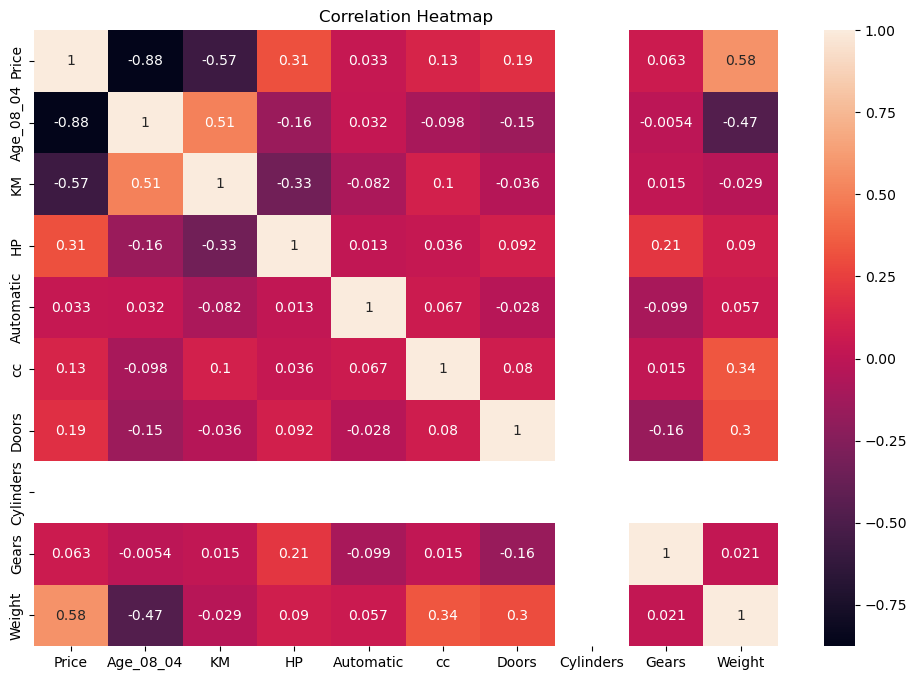

In [7]:
# Correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(), annot=True)
plt.title("Correlation Heatmap")
plt.show()

In [8]:
#here km and age(0.51),weight and age(-0.47) are correlated

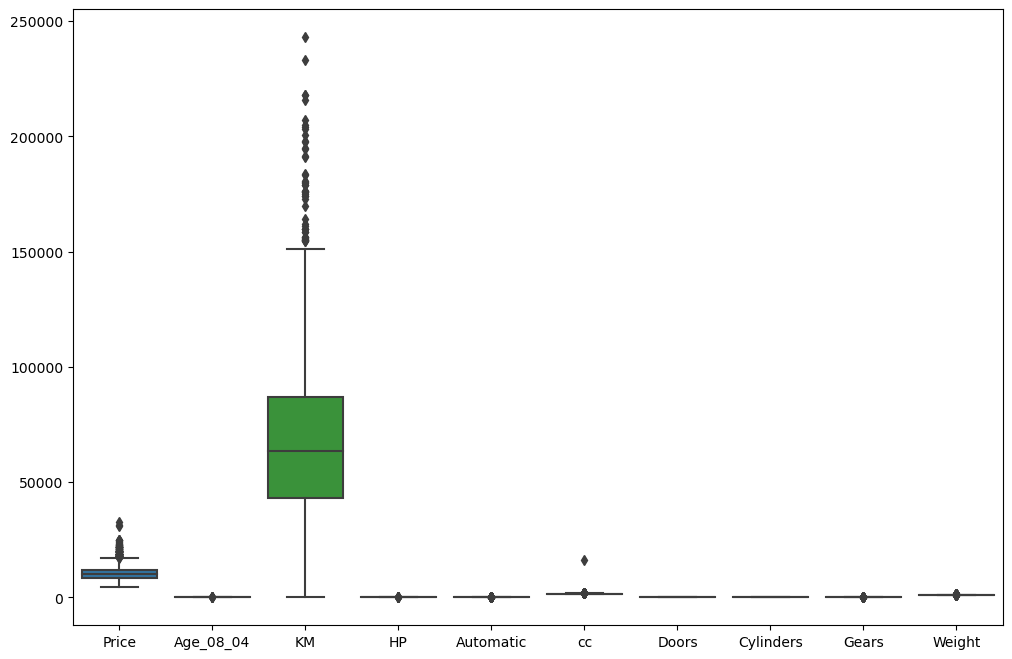

In [15]:
#checking outliers
plt.figure(figsize=(12, 8))
sns.boxplot(data)
plt.show()

In [35]:
#remove outlier
data_new = data[(data["KM"]<143000) & (data["Price"]<14000)]

{'whiskers': [<matplotlib.lines.Line2D at 0x22fe8850070>,
 'caps': [<matplotlib.lines.Line2D at 0x22fe8850160>,
 'boxes': [<matplotlib.lines.Line2D at 0x22fe88526b0>,
 'medians': [<matplotlib.lines.Line2D at 0x22fe8851690>,
 'fliers': [<matplotlib.lines.Line2D at 0x22fe8851b10>,
 'means': []}

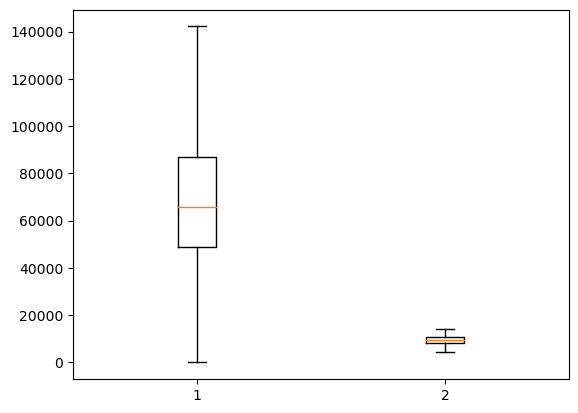

In [36]:
#checking after removing outlier
column = data_new[["KM","Price"]]
plt.boxplot(column)

In [39]:
data_new.shape

(1184, 11)

In [42]:
data_new.head()

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500,23,46986,Diesel,90,0,2000,3,4,5,1165
1,13750,23,72937,Diesel,90,0,2000,3,4,5,1165
2,13950,24,41711,Diesel,90,0,2000,3,4,5,1165
4,13750,30,38500,Diesel,90,0,2000,3,4,5,1170
5,12950,32,61000,Diesel,90,0,2000,3,4,5,1170


In [38]:
#checking null values
data_new.isnull().sum()

Price        0
Age_08_04    0
KM           0
Fuel_Type    0
HP           0
Automatic    0
cc           0
Doors        0
Cylinders    0
Gears        0
Weight       0
dtype: int64

In [ ]:
#there are no null values

In [41]:
#check for special character
for i in data_new.columns:
    print(f"Unique values for column: {i}\n\n{data_new[i].unique()}\n")

Unique values for column: Price

[13500 13750 13950 12950 13250 12995  4750 11750 11950 11900  9950 11495
 11250 10500 10450 11500 12500 10950 11450 11790 12450 11690 12750 11925
 12900 11650 10850  9940 13450 12495 12000 11480 12850 11700 11895 13875
 12295 13995  9900 11990 10750 11695 11000 12400 12200 12695 10250  9250
  7750  9450  8250  4450  9000  8950  5150  7900 10900  9750 11290 10895
 10995  8900  9850  8695 10990  9500  8750  9930  9799  9700  9990  9475
 10000 10495  9400  9650  9550 13000 11710  9980 12250 11930 10800 10600
  7500  7350  6900  7950  9800  7995  8600  7250  6950  8000  5950  8500
  8495  9895  7999  8450  8490  8150  7450  9130  8990  8995  9995 10400
  8800  7800  8100  8200 10295  9795 10350  8400  8895  9390  8745  8850
  9695  9245  6500  5250  6450  6650  5750  7600  7460  6800  8700  6640
  6750  8050  7795  6490  6425  6495  6990  7200  6250  7300  9200  7850
  7495  7990  7490  7145  7400  6999  7499  7150  5845  7000 10845]

Unique values for colu

In [44]:
object_list = ["Fuel_Type"]

In [46]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for x in object_list:
    data_new[x] = le.fit_transform(data_new[x])
    le_name_mapping = dict(zip(le.classes_,le.transform(le.classes_)))
    print('Feature: ',x)
    print('Mapping: ',le_name_mapping)

Feature:  Fuel_Type
Mapping:  {'CNG': 0, 'Diesel': 1, 'Petrol': 2}


C:\Users\sheetal\AppData\Local\Temp\ipykernel_13688\147695175.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_new[x] = le.fit_transform(data_new[x])


In [47]:
data_new.head()

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500,23,46986,1,90,0,2000,3,4,5,1165
1,13750,23,72937,1,90,0,2000,3,4,5,1165
2,13950,24,41711,1,90,0,2000,3,4,5,1165
4,13750,30,38500,1,90,0,2000,3,4,5,1170
5,12950,32,61000,1,90,0,2000,3,4,5,1170


In [48]:
data_new.columns

Index(['Price', 'Age_08_04', 'KM', 'Fuel_Type', 'HP', 'Automatic', 'cc',
       'Doors', 'Cylinders', 'Gears', 'Weight'],
      dtype='object')

In [104]:
#independant and dependant columns
x = data_new.drop('Price', axis=1) #drop price column
y = data_new['Price'] #take only price column

In [105]:
x

,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,23,46986,1,90,0,2000,3,4,5,1165
1,23,72937,1,90,0,2000,3,4,5,1165
2,24,41711,1,90,0,2000,3,4,5,1165
4,30,38500,1,90,0,2000,3,4,5,1170
5,32,61000,1,90,0,2000,3,4,5,1170
...,...,...,...,...,...,...,...,...,...,...
1431,69,20544,2,86,0,1300,3,4,5,1025
1432,72,19000,2,86,0,1300,3,4,5,1015
1433,71,17016,2,86,0,1300,3,4,5,1015
1434,70,16916,2,86,0,1300,3,4,5,1015


In [106]:
y

0       13500
1       13750
2       13950
4       13750
5       12950
        ...  
1431     7500
1432    10845
1433     8500
1434     7250
1435     6950
Name: Price, Length: 1184, dtype: int64

In [107]:
#splitting data into train and test
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2) #20% for testing

In [108]:
print(x_train.shape)
print(x_test.shape)
print()
print(y_train.shape)
print(y_test.shape)

(947, 10)
(237, 10)

(947,)
(237,)


In [109]:
from sklearn.linear_model import LinearRegression

model1 = LinearRegression()

In [110]:
#model-1: using all features
#training model
model1.fit(x_train,y_train)

LinearRegression()

In [111]:
print(model1.coef_)

[-9.72531042e+01 -1.31055917e-02  1.36204729e+02  1.40056133e+01
  5.54500529e+02  3.75515382e-01  1.47109263e+02  1.70530257e-13
  8.34297619e+02  3.73421760e+00]


In [112]:
print(model1.intercept_)

5485.793661960921


In [116]:
#model-2: using selected features
selected_features = ['Age_08_04', 'KM', 'HP', 'Weight']
X_train_selected = x_train[selected_features]
X_test_selected = x_test[selected_features]

model2 = LinearRegression()
model2.fit(X_train_selected, y_train)

LinearRegression()

In [118]:
# model-3: Using polynomial features
from sklearn.preprocessing import PolynomialFeatures

# Create PolynomialFeatures object with degree=2
poly = PolynomialFeatures(degree=2)

x_train_poly = poly.fit_transform(x_train)
x_test_poly = poly.transform(x_test)
model3 = LinearRegression()
model3.fit(x_train_poly, y_train)


LinearRegression()

In [119]:
#predict the models
y_pred1 = model1.predict(x_test)
y_pred2 = model2.predict(X_test_selected)
y_pred3 = model3.predict(x_test_poly)

In [123]:
#evaluation on testing data
from sklearn.metrics import r2_score,mean_squared_error

print("Model-1")
print("R-squared:",r2_score(y_test,y_pred1))
print("RMSE:",np.sqrt(mean_squared_error(y_test,y_pred1)))
print()

print("Model-2")
print("R-squared:",r2_score(y_test,y_pred2))
print("RMSE:",np.sqrt(mean_squared_error(y_test,y_pred2)))
print()

print("Model-3")
print("R-squared:",r2_score(y_test,y_pred3))
print("RMSE:",np.sqrt(mean_squared_error(y_test,y_pred3)))


Model-1
R-squared: 0.678984798281427
RMSE: 1039.56409171158

Model-2
R-squared: 0.6581224157364738
RMSE: 1072.8123975015365

Model-3
R-squared: 0.6893609392413446
RMSE: 1022.6252281304302


In [71]:
#here R-squared value close to 0.5 of all 3 models so it needs tunning

In [128]:
from sklearn.linear_model import Ridge

#  Ridge regression models
ridge_model1 = Ridge()  # You need to specify the alpha parameter
ridge_model2 = Ridge()
ridge_model3 = Ridge()

# Fit Ridge models
ridge_model1.fit(x_train, y_train)
ridge_model2.fit(X_train_selected, y_train)
ridge_model3.fit(x_train_poly, y_train)

# Predictions on testing data
y_pred_ridge1 = ridge_model1.predict(x_test)
y_pred_ridge2 = ridge_model2.predict(X_test_selected)
y_pred_ridge3 = ridge_model3.predict(x_test_poly)

# Evaluation metrics for Ridge models
print("Ridge Model-1")
print("R-squared:", r2_score(y_test, y_pred_ridge1))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_ridge1)))
print()

print("Ridge Model-2")
print("R-squared:", r2_score(y_test, y_pred_ridge2))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_ridge2)))
print()

print("Ridge Model-3")
print("R-squared:", r2_score(y_test, y_pred_ridge3))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_ridge3)))

Ridge Model-1
R-squared: 0.6790803447213989
RMSE: 1039.4093731195799

Ridge Model-2
R-squared: 0.6581222365554527
RMSE: 1072.8126786366627

Ridge Model-3
R-squared: 0.6889837764950046
RMSE: 1023.2458505599635


c:\ProgramData\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=4.87836e-23): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


In [129]:
from sklearn.linear_model import Lasso
# Instantiate Lasso regression models
lasso_model1 = Lasso() 
lasso_model2 = Lasso()
lasso_model3 = Lasso()

# Fit Lasso models
lasso_model1.fit(x_train, y_train)
lasso_model2.fit(X_train_selected, y_train)
lasso_model3.fit(x_train_poly, y_train)

# Predictions on testing data
y_pred_lasso1 = lasso_model1.predict(x_test)
y_pred_lasso2 = lasso_model2.predict(X_test_selected)
y_pred_lasso3 = lasso_model3.predict(x_test_poly)

# Evaluation metrics for Lasso models
print("Lasso Model-1")
print("R-squared:", r2_score(y_test, y_pred_lasso1))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_lasso1)))
print()

print("Lasso Model-2")
print("R-squared:", r2_score(y_test, y_pred_lasso2))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_lasso2)))
print()

print("Lasso Model-3")
print("R-squared:", r2_score(y_test, y_pred_lasso3))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_lasso3)))


Lasso Model-1
R-squared: 0.6789105106540723
RMSE: 1039.6843699446813

Lasso Model-2
R-squared: 0.6581224450029686
RMSE: 1072.812351582382

Lasso Model-3
R-squared: 0.6499391365016334
RMSE: 1085.5760421674174


c:\ProgramData\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.241e+08, tolerance: 3.181e+05
  model = cd_fast.enet_coordinate_descent(
